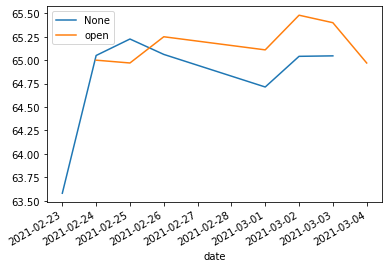

65.16857142857144
0.6265758647263778


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings


def ad_test(dataSet):
    dfTest = adfuller(dataSet, autolag='AIC')
    print('P value is: ', dfTest[1])


df = pd.read_csv('engroStockData.csv', index_col='date', parse_dates=True)
df = df.dropna()

# print('Shape of the data is :', df.shape)
# print(df.head())

# For differencing
# df['open'] = df['open'] - df['open'].shift(1)
# df['open'] = df['open'].diff()
# df = df.dropna()
# print(df)

# For plotting
# df['open'].plot(figsize=(12, 5))
# ad_test(df['open'])
# pt.show()


# Auto Arima for getting best parameters
warnings.filterwarnings('ignore')
# stepwise_fit = auto_arima(df['open'], trace=True, suppress_warnings=True)
# stepwise_fit.summary()


# # print(df.shape)
train = df.iloc[7:]
test = df.iloc[:7]


model = ARIMA(train['open'], order=(5, 0, 0))
model = model.fit(disp=0)
# model.summary()

start = 1
end = len(test)
predict = model.predict(start=start, end=end, typ='levels')
predict.index = df.index[start: end+1]
# print(predict)
# print(test)

# Plot checking for prediction
predict.plot(legend=True)
test['open'].plot(legend=True)
pt.show()


# For checking Mean of both
print(test['open'].mean())
rmse = sqrt(mean_squared_error(predict, test['open']))
print(rmse)